In [18]:
# Import packages
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from tqdm import tqdm
import itertools
import glob


In [19]:
def calc_distance(points):
    """ Calculate the euclidean distance between two clusters. """

    total_distance = 0

    for ind in np.arange(1,len(points)):
        curr_distance = distance.euclidean(points[ind-1], points[ind])
        total_distance += curr_distance

    
    return total_distance

In [20]:
def calc_shortest_distance(bird_id, centroids):
    if centroids.shape[0]<2:
        print('Bird ', bird_id, ' has <2 clusters:', centroids.shape[0])
        return 0

    # if centroids.shape[0]>6:
    #     print('Bird ', bird_id, ' has >6 clusters:', centroids.shape[0])
    #     return 0
    
    all_permutations = np.array(list(itertools.permutations(centroids)))
    perm_distances = [calc_distance(permutation) for permutation in all_permutations]
    shortest_distance = np.min(perm_distances)
    return shortest_distance
        

In [21]:
def gather_path_info(bird_id, centroid_df,type='kmeans'):

    if type=='ameans':
        bird_centroids = centroid_df.loc[(centroid_df.bird_id==bird_id)  & (centroid_df.cluster_id<300) , ["centroid_x", "centroid_y"]].values
    elif type=='kmeans':
        bird_centroids = centroid_df.loc[(centroid_df.bird_id==bird_id)  & (centroid_df.cluster_id<300) , ["kcentroid_x", "kcentroid_y"]].values
    else:
        print("Type has to be kmeans/ameans.")

    n_syll = bird_centroids.shape[0]

    
    print("bird_id: ", bird_id)
    print("n_syll: ", n_syll)

    path_length = calc_shortest_distance(bird_id, bird_centroids)

    
    return path_length, n_syll

In [22]:
def identify_non_focal_birds(centroid_df, focal_bird):
    centroid_df = centroid_df[centroid_df.cluster_id<300]
    bird_list = np.unique(centroid_df['bird_id'].values)
    bird_list = bird_list.tolist()
    bird_list.remove(focal_bird)
    bird_list = np.array(bird_list, dtype=int)
    bird_list =  np.sort(bird_list)
    print(bird_list.shape)
    return bird_list

In [23]:
# def gather_bird_path_lengths(centroid_df, n_birds, n_iter):
#     bird_ids = np.arange(n_birds)
#     # Find distance between all pairs of clusters
#     for bird_id in bird_ids:
#         dist, n_syll = gather_path_info(bird_id, centroid_df)

        
#         # Store the pairwise distance in the distance matrix
#         distance_matrix[bird_id, n_iter] = dist
#         # distance_matrix[cluster2, cluster1, n_iter] = 0
#         distance_dict['bird_id'].append(bird_id)
#         distance_dict['iteration'].append(n_iter)
#         distance_dict['distance'].append(dist)
#         distance_dict['n_syll'].append(n_syll)


In [24]:
def gather_focal_bird_path_length(centroid_df, focal_bird, combo_no):
        dist, n_syll = gather_path_info(focal_bird, centroid_df, type='ameans')
        kdist, n_syll = gather_path_info(focal_bird, centroid_df, type='kmeans')

        non_focal_birds = identify_non_focal_birds(centroid_df, focal_bird)

        
        # Store the pairwise distance in the distance matrix
        distance_matrix[focal_bird, combo_no] = kdist
        # distance_matrix[cluster2, cluster1, n_iter] = 0
        distance_dict['focal_bird_id'].append(focal_bird)
        distance_dict['combo_no'].append(combo_no)
        distance_dict['distance'].append(dist)
        distance_dict['kdistance'].append(kdist)
        distance_dict['n_syll'].append(n_syll)
        distance_dict['non_focal_birds'].append(non_focal_birds)
        distance_dict['range_0_min'] = centroid_df['range_0_min'].values[0]
        distance_dict['range_1_min'] = centroid_df['range_1_max'].values[0]
        distance_dict['range_0_max'] = centroid_df['range_0_min'].values[0]
        distance_dict['range_1_max'] = centroid_df['range_1_max'].values[0]


In [25]:

data_folder = "/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Main script/Data/"
results_folder ="/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/Permutations_w_focal_bird/Results/"
embeddings_folder = results_folder + '/Embeddings/'
centroids_folder = results_folder + '/KCentroids/'
distances_folder = results_folder + '/KDistances/'


In [26]:
normalise = False
# n_embeddings = 42
n_syllables = 150 # Tutored

In [27]:


# Set the number of iterations and number of clusters expected (= # of digits) 
# n_iterations = n_embeddings #len(rseeds)
n_birds  = 31 #31 Tutored birds
n_combos = 10

# Initialising a matrix to hold all the pairwise distances in each representation
distance_matrix = np.zeros((n_birds, n_combos))
distance_dict = {
    'focal_bird_id': [],
    'combo_no': [],
    'distance': [],
    'kdistance': [],
    'n_syll': [],
    'non_focal_birds': [],
    'range_0_min': [],
    'range_1_min': [],
    'range_0_max': [],
    'range_1_max': []
}

In [28]:
centroid_files = glob.glob(centroids_folder + 'centroids*.csv')


In [29]:
for centroid_file in centroid_files:

    print(centroid_file)

    focal_bird = centroid_file.split('.')[0].split('_')[-2]
    combo_no = centroid_file.split('.')[0].split('_')[-1]
    results_filename_tag = '_' + focal_bird + '_' + combo_no
    focal_bird = int(focal_bird)
    combo_no = int(combo_no)




    centroid_df = pd.read_csv(centroid_file) 

    gather_focal_bird_path_length(centroid_df, focal_bird, combo_no)

    
 


/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/Permutations_w_focal_bird/Results//KCentroids/centroids__24_0.csv
bird_id:  24
n_syll:  4
bird_id:  24
n_syll:  4
(5,)
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/Permutations_w_focal_bird/Results//KCentroids/centroids__14_9.csv
bird_id:  14
n_syll:  4
bird_id:  14
n_syll:  4
(5,)
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/Permutations_w_focal_bird/Results//KCentroids/centroids__28_1.csv
bird_id:  28
n_syll:  5
bird_id:  28
n_syll:  5
(5,)
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/Permutations_w_focal_bird/Results//KCentroids/centroids__26_5.csv
bird_id:  26
n_syll:  3
bird_id:  26
n_syll:  3
(5,)
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/Permutations_w_focal_bird/Results//KCentroids/centroids__15_5.csv
bird_id:  15
n_syll:  6
bird_id:  15
n_syll:  6
(5,)
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/Permutati

In [30]:

# Save the distance matrix in an npy file
np.save(distances_folder +  'path_length_matrix' + '.npy', distance_matrix)

# Store the distance matrix in a csv file
distance_df = pd.DataFrame.from_dict(distance_dict)
distance_df.to_csv(distances_folder + 'path_length_df' + '.csv', index=True)  

In [31]:
distance_df

,focal_bird_id,combo_no,distance,kdistance,n_syll,non_focal_birds,range_0_min,range_1_min,range_0_max,range_1_max
0,24,0,36.043684,37.206730,4,"[0, 3, 13, 17, 23]",-6.133813,20.183666,-6.133813,20.183666
1,14,9,38.705387,44.457878,4,"[8, 13, 15, 28, 29]",-6.133813,20.183666,-6.133813,20.183666
2,28,1,27.986495,28.147532,5,"[8, 10, 11, 14, 16]",-6.133813,20.183666,-6.133813,20.183666
3,26,5,17.905833,18.111148,3,"[0, 7, 10, 11, 27]",-6.133813,20.183666,-6.133813,20.183666
4,15,5,40.487096,39.929674,6,"[2, 3, 10, 19, 30]",-6.133813,20.183666,-6.133813,20.183666
...,...,...,...,...,...,...,...,...,...,...
305,12,7,15.750833,16.000187,3,"[2, 4, 15, 22, 29]",-6.133813,20.183666,-6.133813,20.183666
306,20,3,36.530018,37.984302,4,"[11, 19, 21, 23, 24]",-6.133813,20.183666,-6.133813,20.183666
307,27,4,29.579692,33.249395,4,"[4, 13, 21, 28, 29]",-6.133813,20.183666,-6.133813,20.183666
308,2,5,35.968103,40.123688,6,"[5, 16, 19, 25, 29]",-6.133813,20.183666,-6.133813,20.183666


### Analyses

#### Plotting the pairwise distance b/w a given pair across the several iteratiions

In [32]:
n_birds

31

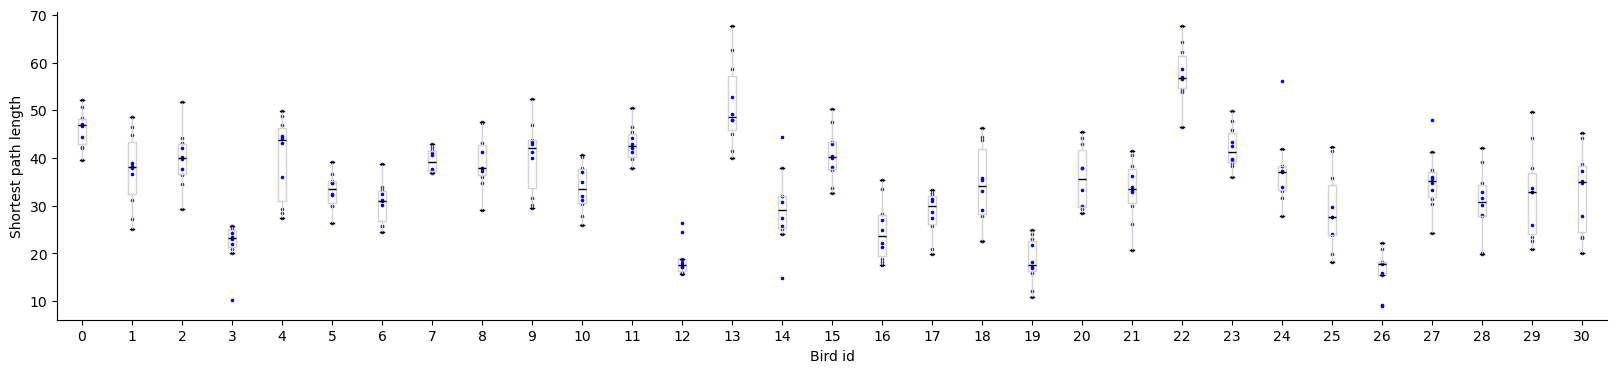

In [33]:
# Plot distances from all iterations for each pair of digit clusters
fig, ax = plt.subplots(1, figsize=(20, 4))
x_ticklabels = []

# Iterating through all pairs of digits
for i in np.arange(n_birds):
            # Make a box plot
            ax.boxplot(distance_matrix[i],
                   patch_artist=False,  # fill with color
                   positions = [i],
                   boxprops=dict(color='lightgrey'),
                   whiskerprops=dict(color='lightgrey'),
                   showfliers = False,
                   medianprops = dict(color='black')
                   ) 
            # Indicate each data point
            ax.scatter(np.zeros((n_combos))+i, distance_matrix[i], s=10, color='blue', marker='.')

            # # Add the x-tick labels
            # tl = str(i) 
            # x_ticklabels.append(tl)

            # Increment the position on the x axis
            # k += 1

# Plot formatting
# ax.set_xticklabels(x_ticklabels, rotation=45);
ax.set_ylabel('Shortest path length')
ax.set_xlabel('Bird id')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)



Fig: The x axis indicates the pair of clusters being tested. The blue point shows the euclidean distance b/w the clusters of the test pair, in one UMAP representation. The box plot describes the distribution of pairwise distances for a given test pair.

In [34]:
# Saving the figure
fig.savefig(distances_folder + 'path_lengths_vs_split.png', bbox_inches='tight')